In [28]:
#Importing modules
import pandas as pd

#Reading csv files
df=pd.read_csv('data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [29]:
#Basic statistical description of the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [2]:
#Checking if there are any null values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [3]:
#Replacing the null values with mean
df['Calories'].fillna(df['Calories'].mean(),inplace=True)

#Checking if null still exists
df['Calories'].isnull().sum()

0

In [4]:
#Aggregating the duration and pulse data using: min, max, count, mean
df.groupby(['Duration','Pulse']).agg({'Calories':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})

Calories                       Maxpulse                  
                    min     max count    mean      min  max count   mean
Duration Pulse                                                          
15       80        50.5    50.5     1    50.5      100  100     1  100.0
         124      124.2   124.2     1   124.2      139  139     1  139.0
20       83        50.3    50.3     1    50.3      107  107     1  107.0
         95        77.7    77.7     1    77.7      112  112     1  112.0
         106      110.4   110.4     1   110.4      136  136     1  136.0
...                 ...     ...   ...     ...      ...  ...   ...    ...
180      101      600.1   600.1     1   600.1      127  127     1  127.0
210      108     1376.0  1376.0     1  1376.0      160  160     1  160.0
         137     1860.4  1860.4     1  1860.4      184  184     1  184.0
270      100     1729.0  1729.0     1  1729.0      131  131     1  131.0
300      108     1500.2  1500.2     1  1500.2      143  143     1  143.0

[94 rows x 8 columns]

In [5]:
#Calories between 500 and 1000 data
df[(df['Calories'].between(500,1000))]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [7]:
#Calories > 500 and pulse < 1000 data
df[(df['Calories'] > 500) & (df['Pulse'] <= 100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
79,270,100,131,1729.0
87,120,100,157,1000.1
99,90,93,124,604.1
103,90,90,100,500.4


In [8]:
#df that contains all the columns from df except for “Maxpulse”
df_modified = df.loc[:,df.columns!='Maxpulse']
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [9]:
#Deleting Maxpulse in the df
df.drop('Maxpulse',axis=1)

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [10]:
#Converting the  Calories column data type to int data type
df['Calories']=df['Calories'].astype(int)
type(df['Calories'][0])

numpy.int64

<Axes: xlabel='Duration', ylabel='Calories'>

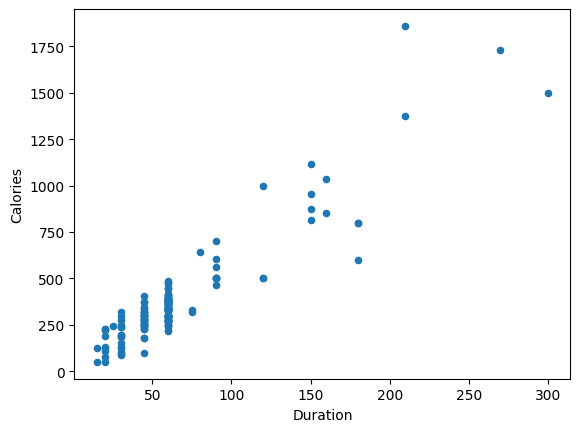

In [12]:
#Scatter plot for Duration and Calories
df.plot.scatter(x='Duration',y='Calories')

In [30]:
#Reading csv files
sdf=pd.read_csv('Salary_Data.csv')
sdf.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
#Basic statistical description of the data
sdf.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [32]:
#Importing data
from sklearn.model_selection import train_test_split

#Split the data in train_test partitions
X_Train, X_Test, Y_Train, Y_Test = train_test_split(sdf.iloc[:, :-1].values,sdf.iloc[:,1].values, test_size =0.2)

In [16]:
#Importing modules
from sklearn.linear_model import LinearRegression

#Loading the linear regression model
regressor = LinearRegression()

#Fitting the data into the model
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [22]:
#Predicting the data for testing using the until model
Y_Pred=regressor.predict(X_Test)
Y_Pred

array([ 53794.18687068,  89010.89368285, 101985.46987681,  91791.16001013,
        60281.47496765,  55647.69775553])

In [23]:
#Importing the model
import math
from sklearn.metrics import mean_squared_error as mse

#Calculating the mean_squared error
mse(Y_Pred,Y_Test)

40120736.18763112

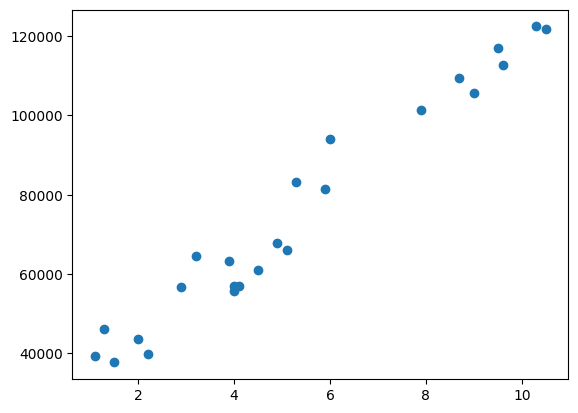

In [19]:
#Visualizing train data using scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_Train,Y_Train)

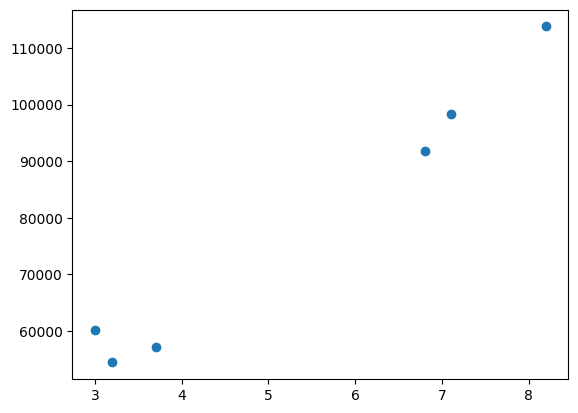

In [20]:
#Visualizing test data using scatter plot
plt.scatter(X_Test,Y_Test)